In [1]:
#%run -i "apple-health-data-parser" "export.xml"

In [2]:
#%pip install ipython
#%pip install seaborn

In [3]:
import pylab as plt
import seaborn as sns

In [112]:
import datetime
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests as req
from bs4 import BeautifulSoup as bs

In [5]:
#abrir csv
#pd.read_csv('.csv',sep=',')

In [6]:
#guardar csv
#.to_csv('.csv',sep=',',index=False)

In [7]:
wk_ori=pd.read_csv('Workout.csv',sep=',')

In [8]:
wk=wk_ori.copy()

In [9]:
wk.head()

,sourceName,sourceVersion,device,creationDate,startDate,endDate,workoutActivityType,duration,durationUnit,totalDistance,totalDistanceUnit,totalEnergyBurned,totalEnergyBurnedUnit
0,Salud,9.3.1,NaN,2016-04-18 14:44:33 +0100,2016-04-17 21:30:00 +0100,2016-04-17 21:45:00 +0100,HKWorkoutActivityTypeMixedMetabolicCardioTraining,15.0,min,NaN,NaN,NaN,NaN
1,Salud,9.3.1,NaN,2016-04-18 14:28:56 +0100,2016-04-18 07:28:00 +0100,2016-04-18 07:35:00 +0100,HKWorkoutActivityTypeMixedMetabolicCardioTraining,7.0,min,NaN,NaN,NaN,NaN
2,Salud,9.3.1,NaN,2016-04-25 00:06:28 +0100,2016-04-24 21:30:00 +0100,2016-04-24 22:00:00 +0100,HKWorkoutActivityTypeYoga,30.0,min,NaN,NaN,NaN,NaN
3,Salud,9.3.1,NaN,2016-05-10 17:07:09 +0100,2016-05-08 21:00:00 +0100,2016-05-08 23:00:00 +0100,HKWorkoutActivityTypeDance,120.0,min,NaN,NaN,NaN,NaN
4,Salud,9.3.1,NaN,2016-05-10 17:05:30 +0100,2016-05-10 15:30:00 +0100,2016-05-10 17:04:00 +0100,HKWorkoutActivityTypeDance,94.0,min,NaN,NaN,NaN,NaN


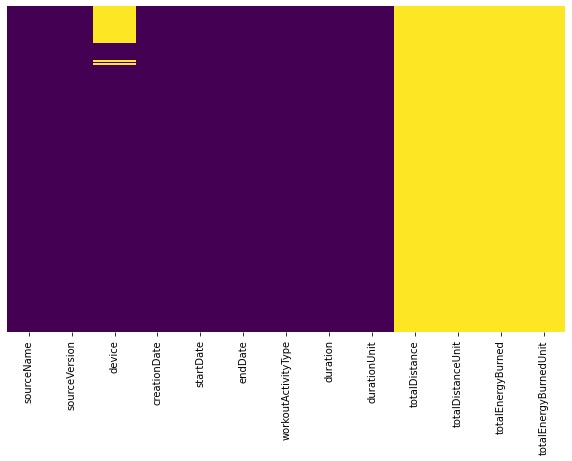

In [10]:
plt.figure(figsize=(10, 6))  # inicia la figura y establece tamaño

sns.heatmap(wk.isna(),  # mapa de calor
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()

In [11]:
wk.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sourceName             177 non-null    object 
 1   sourceVersion          177 non-null    object 
 2   device                 155 non-null    object 
 3   creationDate           177 non-null    object 
 4   startDate              177 non-null    object 
 5   endDate                177 non-null    object 
 6   workoutActivityType    177 non-null    object 
 7   duration               177 non-null    float64
 8   durationUnit           177 non-null    object 
 9   totalDistance          0 non-null      float64
 10  totalDistanceUnit      0 non-null      float64
 11  totalEnergyBurned      0 non-null      float64
 12  totalEnergyBurnedUnit  0 non-null      float64
dtypes: float64(5), object(8)
memory usage: 129.5 KB


In [12]:
wk.shape

(177, 13)

In [13]:
nan_cols=wk.isna().sum()

nan_cols[nan_cols>0]

device                    22
totalDistance            177
totalDistanceUnit        177
totalEnergyBurned        177
totalEnergyBurnedUnit    177
dtype: int64

In [14]:
wk.device.fillna('unknown',inplace=True)

In [15]:
# functions to convert UTC to Europe/Madrid time zone and extract date/time elements
convert_tz = lambda x: x.to_pydatetime().replace(tzinfo=pytz.utc).astimezone(pytz.timezone('Europe/Madrid'))
get_year = lambda x: convert_tz(x).year
get_month = lambda x: '{}-{:02}'.format(convert_tz(x).year, convert_tz(x).month) #inefficient
get_date = lambda x: '{}-{:02}-{:02}'.format(convert_tz(x).year, convert_tz(x).month, convert_tz(x).day) #inefficient
get_day = lambda x: convert_tz(x).day
get_hour = lambda x: convert_tz(x).hour
get_minute = lambda x: convert_tz(x).minute
get_day_of_week = lambda x: convert_tz(x).weekday()

In [16]:
wk['startDate'] = pd.to_datetime(wk['startDate'])
wk['year'] = wk['startDate'].map(get_year)
wk['month'] = wk['startDate'].map(get_month)
wk['date'] = wk['startDate'].map(get_date)
wk['day'] = wk['startDate'].map(get_day)
wk['hour'] = wk['startDate'].map(get_hour)
wk['dow'] = wk['startDate'].map(get_day_of_week)

In [17]:
wk.tail()

,sourceName,sourceVersion,device,creationDate,startDate,endDate,workoutActivityType,duration,durationUnit,totalDistance,totalDistanceUnit,totalEnergyBurned,totalEnergyBurnedUnit,year,month,date,day,hour,dow
172,Apple Watch de María,9.1,"<<HKDevice: 0x2805a3750>, name:Apple Watch, ma...",2022-11-06 14:25:32 +0100,2022-11-06 13:12:17+01:00,2022-11-06 14:25:28 +0100,HKWorkoutActivityTypeTraditionalStrengthTraining,73.185212,min,NaN,NaN,NaN,NaN,2022,2022-11,2022-11-06,6,14,6
173,Apple Watch de María,9.1,"<<HKDevice: 0x2805a3750>, name:Apple Watch, ma...",2022-11-08 20:58:21 +0100,2022-11-08 20:15:05+01:00,2022-11-08 20:58:19 +0100,HKWorkoutActivityTypeTraditionalStrengthTraining,43.222833,min,NaN,NaN,NaN,NaN,2022,2022-11,2022-11-08,8,21,1
174,Apple Watch de María,9.1,"<<HKDevice: 0x2805a3750>, name:Apple Watch, ma...",2022-11-09 08:12:38 +0100,2022-11-09 07:47:43+01:00,2022-11-09 08:12:36 +0100,HKWorkoutActivityTypeWalking,24.889142,min,NaN,NaN,NaN,NaN,2022,2022-11,2022-11-09,9,8,2
175,Apple Watch de María,9.1,"<<HKDevice: 0x2805a3750>, name:Apple Watch, ma...",2022-11-09 20:26:02 +0100,2022-11-09 19:48:39+01:00,2022-11-09 20:25:58 +0100,HKWorkoutActivityTypeWalking,37.321552,min,NaN,NaN,NaN,NaN,2022,2022-11,2022-11-09,9,20,2
176,Apple Watch de María,9.1,"<<HKDevice: 0x2805a3750>, name:Apple Watch, ma...",2022-11-10 08:26:40 +0100,2022-11-10 08:11:16+01:00,2022-11-10 08:26:39 +0100,HKWorkoutActivityTypeWalking,15.375025,min,NaN,NaN,NaN,NaN,2022,2022-11,2022-11-10,10,9,3


In [18]:
wk.workoutActivityType= wk.workoutActivityType.str.replace('HKWorkoutActivityType','')

In [19]:
wk.head()

,sourceName,sourceVersion,device,creationDate,startDate,endDate,workoutActivityType,duration,durationUnit,totalDistance,totalDistanceUnit,totalEnergyBurned,totalEnergyBurnedUnit,year,month,date,day,hour,dow
0,Salud,9.3.1,unknown,2016-04-18 14:44:33 +0100,2016-04-17 21:30:00+01:00,2016-04-17 21:45:00 +0100,MixedMetabolicCardioTraining,15.0,min,NaN,NaN,NaN,NaN,2016,2016-04,2016-04-17,17,23,6
1,Salud,9.3.1,unknown,2016-04-18 14:28:56 +0100,2016-04-18 07:28:00+01:00,2016-04-18 07:35:00 +0100,MixedMetabolicCardioTraining,7.0,min,NaN,NaN,NaN,NaN,2016,2016-04,2016-04-18,18,9,0
2,Salud,9.3.1,unknown,2016-04-25 00:06:28 +0100,2016-04-24 21:30:00+01:00,2016-04-24 22:00:00 +0100,Yoga,30.0,min,NaN,NaN,NaN,NaN,2016,2016-04,2016-04-24,24,23,6
3,Salud,9.3.1,unknown,2016-05-10 17:07:09 +0100,2016-05-08 21:00:00+01:00,2016-05-08 23:00:00 +0100,Dance,120.0,min,NaN,NaN,NaN,NaN,2016,2016-05,2016-05-08,8,23,6
4,Salud,9.3.1,unknown,2016-05-10 17:05:30 +0100,2016-05-10 15:30:00+01:00,2016-05-10 17:04:00 +0100,Dance,94.0,min,NaN,NaN,NaN,NaN,2016,2016-05,2016-05-10,10,17,1


In [20]:
wk.sourceName.unique()

array(['Salud', 'Apple\xa0Watch de María'], dtype=object)

In [21]:
wk.sourceName = wk.sourceName.str.replace('Apple\xa0Watch de María','Apple Watch de Maria')

In [22]:
wk.tail()

,sourceName,sourceVersion,device,creationDate,startDate,endDate,workoutActivityType,duration,durationUnit,totalDistance,totalDistanceUnit,totalEnergyBurned,totalEnergyBurnedUnit,year,month,date,day,hour,dow
172,Apple Watch de Maria,9.1,"<<HKDevice: 0x2805a3750>, name:Apple Watch, ma...",2022-11-06 14:25:32 +0100,2022-11-06 13:12:17+01:00,2022-11-06 14:25:28 +0100,TraditionalStrengthTraining,73.185212,min,NaN,NaN,NaN,NaN,2022,2022-11,2022-11-06,6,14,6
173,Apple Watch de Maria,9.1,"<<HKDevice: 0x2805a3750>, name:Apple Watch, ma...",2022-11-08 20:58:21 +0100,2022-11-08 20:15:05+01:00,2022-11-08 20:58:19 +0100,TraditionalStrengthTraining,43.222833,min,NaN,NaN,NaN,NaN,2022,2022-11,2022-11-08,8,21,1
174,Apple Watch de Maria,9.1,"<<HKDevice: 0x2805a3750>, name:Apple Watch, ma...",2022-11-09 08:12:38 +0100,2022-11-09 07:47:43+01:00,2022-11-09 08:12:36 +0100,Walking,24.889142,min,NaN,NaN,NaN,NaN,2022,2022-11,2022-11-09,9,8,2
175,Apple Watch de Maria,9.1,"<<HKDevice: 0x2805a3750>, name:Apple Watch, ma...",2022-11-09 20:26:02 +0100,2022-11-09 19:48:39+01:00,2022-11-09 20:25:58 +0100,Walking,37.321552,min,NaN,NaN,NaN,NaN,2022,2022-11,2022-11-09,9,20,2
176,Apple Watch de Maria,9.1,"<<HKDevice: 0x2805a3750>, name:Apple Watch, ma...",2022-11-10 08:26:40 +0100,2022-11-10 08:11:16+01:00,2022-11-10 08:26:39 +0100,Walking,15.375025,min,NaN,NaN,NaN,NaN,2022,2022-11,2022-11-10,10,9,3


In [23]:
wk.drop(columns='device',inplace=True)

In [24]:
cal_ori=pd.read_csv('ActiveEnergyBurned.csv',sep=',')

/var/folders/s4/79ykyqjn7f16bdl_zqjgsbzh0000gp/T/ipykernel_8312/368845154.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  cal_ori=pd.read_csv('ActiveEnergyBurned.csv',sep=',')


In [25]:
kcl=cal_ori.copy()

In [39]:
kcl['startDate'] = pd.to_datetime(kcl['startDate'])
kcl['year'] = kcl['startDate'].map(get_year)
kcl['month'] = kcl['startDate'].map(get_month)
kcl['date'] = kcl['startDate'].map(get_date)
kcl['day'] = kcl['startDate'].map(get_day)
kcl['hour'] = kcl['startDate'].map(get_hour)
kcl['dow'] = kcl['startDate'].map(get_day_of_week)

In [40]:
kcl.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date,day,hour,dow
0,Salud,9.3.2,NaN,ActiveEnergyBurned,kcal,2016-05-29 10:50:20 +0100,2016-05-28 09:00:00+01:00,2016-05-28 09:36:00 +0100,239.0,2016,2016-05,2016-05-28,28,11,5
1,Zepp Life,202010291402,NaN,ActiveEnergyBurned,kcal,2020-11-05 19:18:43 +0100,2020-11-05 14:40:00+01:00,2020-11-05 14:49:59 +0100,1.0,2020,2020-11,2020-11-05,5,15,3
2,Zepp Life,202010291402,NaN,ActiveEnergyBurned,kcal,2020-11-05 19:18:43 +0100,2020-11-05 16:30:00+01:00,2020-11-05 16:39:59 +0100,1.0,2020,2020-11,2020-11-05,5,17,3
3,Zepp Life,202010291402,NaN,ActiveEnergyBurned,kcal,2020-11-05 19:18:43 +0100,2020-11-05 16:40:00+01:00,2020-11-05 16:49:59 +0100,3.0,2020,2020-11,2020-11-05,5,17,3
4,Zepp Life,202010291402,NaN,ActiveEnergyBurned,kcal,2020-11-05 19:18:43 +0100,2020-11-05 16:50:00+01:00,2020-11-05 16:59:59 +0100,2.0,2020,2020-11,2020-11-05,5,17,3


In [95]:
wk.drop(columns=['totalDistance','totalDistanceUnit','totalEnergyBurned','totalEnergyBurnedUnit'],inplace=True)

In [96]:
wk.head()

,sourceName,sourceVersion,creationDate,startDate,endDate,workoutActivityType,duration,durationUnit,year,month,date,day,hour,dow
0,Salud,9.3.1,2016-04-18 14:44:33 +0100,2016-04-17 21:30:00+01:00,2016-04-17 21:45:00 +0100,MixedMetabolicCardioTraining,15.0,min,2016,2016-04,2016-04-17,17,23,6
1,Salud,9.3.1,2016-04-18 14:28:56 +0100,2016-04-18 07:28:00+01:00,2016-04-18 07:35:00 +0100,MixedMetabolicCardioTraining,7.0,min,2016,2016-04,2016-04-18,18,9,0
2,Salud,9.3.1,2016-04-25 00:06:28 +0100,2016-04-24 21:30:00+01:00,2016-04-24 22:00:00 +0100,Yoga,30.0,min,2016,2016-04,2016-04-24,24,23,6
3,Salud,9.3.1,2016-05-10 17:07:09 +0100,2016-05-08 21:00:00+01:00,2016-05-08 23:00:00 +0100,Dance,120.0,min,2016,2016-05,2016-05-08,8,23,6
4,Salud,9.3.1,2016-05-10 17:05:30 +0100,2016-05-10 15:30:00+01:00,2016-05-10 17:04:00 +0100,Dance,94.0,min,2016,2016-05,2016-05-10,10,17,1


In [97]:
wk['activeCalories'] = wk['duration'] * 7

In [438]:
list(wk.date)

['2016-04-17',
 '2016-04-18',
 '2016-04-24',
 '2016-05-08',
 '2016-05-10',
 '2016-05-11',
 '2016-05-17',
 '2016-05-18',
 '2016-05-25',
 '2016-05-26',
 '2016-05-26',
 '2016-05-28',
 '2016-05-29',
 '2016-05-31',
 '2016-06-01',
 '2016-06-14',
 '2016-06-14',
 '2016-07-01',
 '2016-07-04',
 '2016-07-05',
 '2021-10-17',
 '2021-10-18',
 '2021-10-20',
 '2021-10-22',
 '2021-11-07',
 '2021-11-08',
 '2021-11-12',
 '2021-11-13',
 '2021-11-18',
 '2021-11-21',
 '2021-11-22',
 '2021-11-23',
 '2021-11-23',
 '2021-11-25',
 '2021-11-28',
 '2021-11-29',
 '2021-12-03',
 '2021-12-11',
 '2021-12-22',
 '2021-12-23',
 '2021-12-29',
 '2022-01-02',
 '2022-01-02',
 '2022-01-03',
 '2022-01-04',
 '2022-01-04',
 '2022-01-06',
 '2022-01-07',
 '2022-01-08',
 '2022-01-08',
 '2022-01-10',
 '2022-01-14',
 '2022-01-15',
 '2022-01-18',
 '2022-01-18',
 '2022-01-24',
 '2022-01-25',
 '2022-01-26',
 '2022-01-29',
 '2022-01-29',
 '2022-01-29',
 '2022-01-31',
 '2022-01-31',
 '2022-02-04',
 '2022-02-06',
 '2022-02-06',
 '2022-02-

In [220]:
import json

In [221]:
url="https://opendata.aemet.es/opendata/sh/02e71e39"

In [222]:
html=req.get(url).text
soup=bs(html, 'html.parser')

In [223]:
soup

[ {
  "fecha" : "2016-04-17",
  "indicativo" : "3194U",
  "nombre" : "MADRID, CIUDAD UNIVERSITARIA",
  "provincia" : "MADRID",
  "altitud" : "664",
  "tmed" : "11,6",
  "prec" : "0,0",
  "tmin" : "6,1",
  "horatmin" : "06:20",
  "tmax" : "17,1",
  "horatmax" : "15:50"
}, {
  "fecha" : "2016-04-18",
  "indicativo" : "3194U",
  "nombre" : "MADRID, CIUDAD UNIVERSITARIA",
  "provincia" : "MADRID",
  "altitud" : "664",
  "tmed" : "12,5",
  "prec" : "0,0",
  "tmin" : "4,2",
  "horatmin" : "04:50",
  "tmax" : "20,8",
  "horatmax" : "16:00"
}, {
  "fecha" : "2016-04-19",
  "indicativo" : "3194U",
  "nombre" : "MADRID, CIUDAD UNIVERSITARIA",
  "provincia" : "MADRID",
  "altitud" : "664",
  "tmed" : "12,6",
  "prec" : "26,5",
  "tmin" : "10,5",
  "horatmin" : "12:50",
  "tmax" : "14,7",
  "horatmax" : "00:30"
}, {
  "fecha" : "2016-04-20",
  "indicativo" : "3194U",
  "nombre" : "MADRID, CIUDAD UNIVERSITARIA",
  "provincia" : "MADRID",
  "altitud" : "664",
  "tmed" : "9,6",
  "prec" : "7,6",
  "t

In [224]:
tiempo=json.loads(soup.text)

In [225]:
tp=pd.json_normalize(tiempo)

In [229]:
tp.drop(columns=['indicativo','nombre','altitud','horatmin','provincia'], axis=1, inplace=True)

KeyError: "['indicativo', 'nombre', 'altitud', 'horatmin'] not found in axis"

In [230]:
tp.head()

,fecha,provincia,tmed,prec,tmin,tmax,horatmax
0,2016-04-17,MADRID,"11,6","0,0","6,1","17,1",15:50
1,2016-04-18,MADRID,"12,5","0,0","4,2","20,8",16:00
2,2016-04-19,MADRID,"12,6","26,5","10,5","14,7",00:30
3,2016-04-20,MADRID,"9,6","7,6","7,3","11,9",17:40
4,2016-04-21,MADRID,"12,5","3,1","7,5","17,5",15:00


In [231]:
tp.rename(columns={'fecha':'date','provincia':'provincia','tmed':'tmed','prec':'prec','tmin':'tmin','tmax':'tmax','horatmax':'horatmax'}, inplace =True)

In [232]:
tp.drop(columns=['provincia','horatmax'], inplace=True)

In [207]:
tp.rename(columns={'fecha':'date'}, inplace=True)

In [234]:
tp.head()

,date,tmed,prec,tmin,tmax
0,2016-04-17,"11,6","0,0","6,1","17,1"
1,2016-04-18,"12,5","0,0","4,2","20,8"
2,2016-04-19,"12,6","26,5","10,5","14,7"
3,2016-04-20,"9,6","7,6","7,3","11,9"
4,2016-04-21,"12,5","3,1","7,5","17,5"


In [235]:
wk1=wk.merge(tp, how='left', on='date')

In [240]:
wk1.head()

,sourceName,sourceVersion,creationDate,startDate,endDate,workoutActivityType,duration,durationUnit,year,month,date,day,hour,dow,activeCalories,tmed,prec,tmin,tmax
0,Salud,9.3.1,2016-04-18 14:44:33 +0100,2016-04-17 21:30:00+01:00,2016-04-17 21:45:00 +0100,MixedMetabolicCardioTraining,15.0,min,2016,2016-04,2016-04-17,17,23,6,105.0,"11,6","0,0","6,1","17,1"
1,Salud,9.3.1,2016-04-18 14:28:56 +0100,2016-04-18 07:28:00+01:00,2016-04-18 07:35:00 +0100,MixedMetabolicCardioTraining,7.0,min,2016,2016-04,2016-04-18,18,9,0,49.0,"12,5","0,0","4,2","20,8"
2,Salud,9.3.1,2016-04-25 00:06:28 +0100,2016-04-24 21:30:00+01:00,2016-04-24 22:00:00 +0100,Yoga,30.0,min,2016,2016-04,2016-04-24,24,23,6,210.0,"11,9",NaN,"4,5","19,3"
3,Salud,9.3.1,2016-05-10 17:07:09 +0100,2016-05-08 21:00:00+01:00,2016-05-08 23:00:00 +0100,Dance,120.0,min,2016,2016-05,2016-05-08,8,23,6,840.0,"10,6","13,3","9,1","12,1"
4,Salud,9.3.1,2016-05-10 17:05:30 +0100,2016-05-10 15:30:00+01:00,2016-05-10 17:04:00 +0100,Dance,94.0,min,2016,2016-05,2016-05-10,10,17,1,658.0,"11,6","8,1","7,7","15,6"


In [237]:
list(wk1.date)

['2016-04-17',
 '2016-04-18',
 '2016-04-24',
 '2016-05-08',
 '2016-05-10',
 '2016-05-11',
 '2016-05-17',
 '2016-05-18',
 '2016-05-25',
 '2016-05-26',
 '2016-05-26',
 '2016-05-28',
 '2016-05-29',
 '2016-05-31',
 '2016-06-01',
 '2016-06-14',
 '2016-06-14',
 '2016-07-01',
 '2016-07-04',
 '2016-07-05',
 '2021-10-17',
 '2021-10-18',
 '2021-10-20',
 '2021-10-22',
 '2021-11-07',
 '2021-11-08',
 '2021-11-12',
 '2021-11-13',
 '2021-11-18',
 '2021-11-21',
 '2021-11-22',
 '2021-11-23',
 '2021-11-23',
 '2021-11-25',
 '2021-11-28',
 '2021-11-29',
 '2021-12-03',
 '2021-12-11',
 '2021-12-22',
 '2021-12-23',
 '2021-12-29',
 '2022-01-02',
 '2022-01-02',
 '2022-01-03',
 '2022-01-04',
 '2022-01-04',
 '2022-01-06',
 '2022-01-07',
 '2022-01-08',
 '2022-01-08',
 '2022-01-10',
 '2022-01-14',
 '2022-01-15',
 '2022-01-18',
 '2022-01-18',
 '2022-01-24',
 '2022-01-25',
 '2022-01-26',
 '2022-01-29',
 '2022-01-29',
 '2022-01-29',
 '2022-01-31',
 '2022-01-31',
 '2022-02-04',
 '2022-02-06',
 '2022-02-06',
 '2022-02-

In [247]:
url2="https://opendata.aemet.es/opendata/sh/73e7dea4"

In [251]:
html=req.get(url2).text
soup2=bs(html, 'html.parser')
tiempo=json.loads(soup2.text)
tp=pd.json_normalize(tiempo)
tp.head()

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax
0,2021-01-01,3194U,"MADRID, CIUDAD UNIVERSITARIA",MADRID,664,"4,0","0,1","-0,2",07:00,"8,3",12:20
1,2021-01-02,3194U,"MADRID, CIUDAD UNIVERSITARIA",MADRID,664,"3,0","0,0","-2,2",08:20,"8,1",13:00
2,2021-01-03,3194U,"MADRID, CIUDAD UNIVERSITARIA",MADRID,664,"3,0","0,0","-4,3",06:20,"10,2",13:50
3,2021-01-04,3194U,"MADRID, CIUDAD UNIVERSITARIA",MADRID,664,"3,6","0,0","-1,7",22:50,"9,0",12:30
4,2021-01-05,3194U,"MADRID, CIUDAD UNIVERSITARIA",MADRID,664,"1,0","0,0","-5,3",07:00,"7,2",14:40


In [249]:
tp.drop(columns=['indicativo','nombre','altitud','horatmin','provincia','horatmax'], axis=1, inplace=True)

In [252]:
tp.rename(columns={'fecha':'date'}, inplace=True)

In [253]:
wk2=wk1.merge(tp, how='left', on='date')

In [261]:
from selenium import webdriver

In [262]:
from webdriver_manager.chrome import ChromeDriverManager

In [263]:
from selenium.webdriver.common.by import By   # para buscar segun tag, id, class, etc...

import time

import warnings
warnings.filterwarnings('ignore')

In [280]:
PATH=ChromeDriverManager().install()   # instala el driver

driver=webdriver.Chrome(PATH)         # abre una pestaña de chrome

driver.get('https://www.polar.com/blog/es/zonas-de-frecuencia-cardiaca-los-aspectos-basicos/')

In [281]:
tabla=driver.find_element(By.XPATH, '//*[@id="post-1217"]/div/figure/div/table/tbody')

In [283]:
tabla.text.split('\n')

['Zona Intensidad Porcentaje de FCmáx',
 'Zona 1 Muy suave 50–60%',
 'Zona 2 Suave 60–70%',
 'Zona 3 Moderada 70–80%',
 'Zona 4 Intensa 80–90%',
 'Zona 5 Muy intensa 90–100%']

In [300]:
fila=tabla.text.split('\n')[0]

In [302]:
fila

'Zona Intensidad Porcentaje de FCmáx'

In [303]:
fila=fila.split(' ')

In [304]:
fila

['Zona', 'Intensidad', 'Porcentaje', 'de', 'FCmáx']

In [305]:
fila.remove('Porcentaje')

In [306]:
fila.remove('de')

In [307]:
fila

['Zona', 'Intensidad', 'FCmáx']

In [308]:
body=tabla.text.split('\n')[1:]

In [318]:
body

['Zona 1 Muy suave 50–60%',
 'Zona 2 Suave 60–70%',
 'Zona 3 Moderada 70–80%',
 'Zona 4 Intensa 80–90%',
 'Zona 5 Muy intensa 90–100%']

In [329]:
body1=body[0][:6]+ ',' + body[0][6:16]+ ',' +body[0][16:]

In [335]:
body2=body[1][:6]+ ',' + body[1][6:12]+ ',' +body[1][12:]

In [338]:
body3=body[2][:6]+ ',' + body[2][6:15]+ ',' +body[2][15:]

In [342]:
body4=body[3][:6]+ ',' + body[3][6:14]+ ',' +body[3][14:]

In [346]:
body5=body[4][:6]+ ',' + body[4][6:18]+ ',' +body[4][18:]

In [347]:
body1.split(',')

['Zona 1', ' Muy suave', ' 50–60%']

In [348]:
body2.split(',')

['Zona 2', ' Suave', ' 60–70%']

In [349]:
body3.split(',')

['Zona 3', ' Moderada', ' 70–80%']

In [350]:
body4.split(',')

['Zona 4', ' Intensa', ' 80–90%']

In [351]:
body5.split(',')

['Zona 5', ' Muy intensa', ' 90–100%']

In [352]:
d = {"Zona": ["Zona 1", "Zona 2", "Zona 3", "Zona 4", "Zona 5"], "Intensidad": ['Muy Suave', 'Suave', 'Moderada', 'Intensa', 'Muy Intensa'],'FCmáx':['50–60%','60–70%','70–80%','80–90%','90–100%']}

In [353]:
df = pd.DataFrame(d)

In [354]:
df

,Zona,Intensidad,FCmáx
0,Zona 1,Muy Suave,50–60%
1,Zona 2,Suave,60–70%
2,Zona 3,Moderada,70–80%
3,Zona 4,Intensa,80–90%
4,Zona 5,Muy Intensa,90–100%


In [356]:
df.FCmáx[0]=60

In [357]:
df.FCmáx[1]=70

In [358]:
df.FCmáx[2]=80

In [359]:
df.FCmáx[3]=90

In [360]:
df.FCmáx[4]=100

In [361]:
df.FCmáx[0]=(df.FCmáx[0]*196)/100

In [363]:
df.FCmáx[1]=(df.FCmáx[1]*196)/100

In [364]:
df.FCmáx[2]=(df.FCmáx[2]*196)/100

In [365]:
df.FCmáx[3]=(df.FCmáx[3]*196)/100

In [366]:
df.FCmáx[4]=(df.FCmáx[4]*196)/100

In [367]:
df.FCmáx[4]

196.0

In [368]:
df

,Zona,Intensidad,FCmáx
0,Zona 1,Muy Suave,117.6
1,Zona 2,Suave,137.2
2,Zona 3,Moderada,156.8
3,Zona 4,Intensa,176.4
4,Zona 5,Muy Intensa,196.0


In [416]:
url3="https://opendata.aemet.es/opendata/sh/be990d57"

In [417]:
html3=req.get(url3).text
soup3=bs(html3, 'html.parser')
tiempo3=json.loads(soup3.text)
tp3=pd.json_normalize(tiempo3)
tp3.tail()

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,presMax,horaPresMax,presMin,horaPresMin,dir,velmedia,racha,horaracha
672,2022-11-05,3195,"MADRID, RETIRO",MADRID,667,NaN,"0,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673,2022-11-06,3195,"MADRID, RETIRO",MADRID,667,NaN,"0,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674,2022-11-07,3195,"MADRID, RETIRO",MADRID,667,NaN,"0,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
675,2022-11-08,3195,"MADRID, RETIRO",MADRID,667,"12,2","2,2","9,5",05:20,"14,9",16:10,"941,0",Varias,"939,0",Varias,27,"1,7","6,1",12:50
676,2022-11-09,3195,"MADRID, RETIRO",MADRID,667,"12,3","5,4","9,5",23:00,"15,1",15:00,"946,0",24,"939,7",03,27,"1,4","6,1",06:50


In [418]:
tp3.drop(columns=['indicativo','nombre','altitud','horatmin','provincia','horatmax','tmin','tmax','presMax','horaPresMax','presMin','horaPresMin','dir','velmedia','racha','horaracha'], axis=1, inplace=True)

In [419]:
tp3.head()

,fecha,tmed,prec
0,2021-01-01,"4,0","0,0"
1,2021-01-02,"2,2","0,0"
2,2021-01-03,"3,0","0,0"
3,2021-01-04,"2,7","0,0"
4,2021-01-05,"1,5","0,0"


In [420]:
tp3.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fecha   677 non-null    object
 1   tmed    666 non-null    object
 2   prec    673 non-null    object
dtypes: object(3)
memory usage: 123.9 KB


In [421]:
nan_cols=tp3.isna().sum()

nan_cols[nan_cols>0]

tmed    11
prec     4
dtype: int64

In [430]:
tp3.tmed.fillna(21.41,inplace=True)

In [432]:
tp3.prec.fillna(0.0,inplace=True)

In [434]:
#tp3['tmed'] =tp3['tmed'].str.replace(',','.')

In [425]:
tp3['prec'] =tp3['prec'].str.replace(',','.')

In [435]:
tp3.tail()

,fecha,tmed,prec
672,2022-11-05,21.41,0.0
673,2022-11-06,21.41,0.0
674,2022-11-07,21.41,0.0
675,2022-11-08,12.20,2.2
676,2022-11-09,12.30,5.4


In [427]:
tp3 = tp3.astype({"tmed": float, "prec": float,})

In [436]:
tp3.describe()

,tmed,prec
count,677.000000,677.000000
mean,16.883914,1.314032
std,7.789548,5.234345
min,-3.400000,0.000000
25%,10.400000,0.000000
50%,16.800000,0.000000
75%,22.900000,0.000000
max,33.400000,67.700000


In [439]:
url2016="https://opendata.aemet.es/opendata/sh/791cac90"

In [440]:
html2016=req.get(url2016).text
soup2016=bs(html2016, 'html.parser')
tiempo2016=json.loads(soup2016.text)
tp4=pd.json_normalize(tiempo2016)
tp4.tail()

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,horatmax,dir,velmedia,racha,horaracha,presMax,horaPresMax,presMin,horaPresMin
331,2016-11-27,3195,"MADRID, RETIRO",MADRID,667,"9,6","7,0","8,2",23:30,"10,9",11:40,04,"1,7","6,7",10:20,"932,8",24,"929,8",04
332,2016-11-28,3195,"MADRID, RETIRO",MADRID,667,"9,9","0,0","7,2",23:59,"12,6",12:30,02,"1,9","8,6",10:40,"939,1",23,"931,6",02
333,2016-11-29,3195,"MADRID, RETIRO",MADRID,667,"9,4","1,0","6,8",Varias,"12,0",Varias,04,"1,4","5,3",01:30,"946,8",24,"938,5",Varias
334,2016-11-30,3195,"MADRID, RETIRO",MADRID,667,"11,6","0,0","9,2",02:00,"14,0",14:10,14,"2,8","8,9",13:50,"950,3",11,"946,6",00
335,2016-12-01,3195,"MADRID, RETIRO",MADRID,667,"10,3","0,0","9,4",05:40,"11,2",14:10,13,"1,1","5,8",04:00,"951,3",00,"945,5",24


In [441]:
tp4.drop(columns=['indicativo','nombre','altitud','horatmin','provincia','horatmax','tmin','tmax','presMax','horaPresMax','presMin','horaPresMin','dir','velmedia','racha'], axis=1, inplace=True)

In [445]:
tp4.drop(['horaracha'], axis=1, inplace=True)

In [495]:
tp4.head()

,fecha,tmed,prec
0,2016-01-01,11.3,3.2
1,2016-01-02,8.2,0.0
2,2016-01-03,8.3,0.4
3,2016-01-04,10.2,4.1
4,2016-01-05,6.8,0.0


In [447]:
nan_cols=tp4.isna().sum()

nan_cols[nan_cols>0]

Series([], dtype: int64)

In [450]:
tp4.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fecha   336 non-null    object
 1   tmed    336 non-null    object
 2   prec    336 non-null    object
dtypes: object(3)
memory usage: 61.7 KB


In [451]:
tp4['tmed'] =tp4['tmed'].str.replace(',','.')

In [452]:
tp4['prec'] =tp4['prec'].str.replace(',','.')

In [461]:
tp4.prec.str.contains('Ip').value_counts()

False    333
True       3
Name: prec, dtype: int64

In [463]:
tp4.prec=tp4.prec.str.replace('Ip','0.0')

In [464]:
tp4 = tp4.astype({"tmed": float, "prec": float,})

In [467]:
wjefoieji = tp3 + tp4

In [470]:
weather = pd.concat([tp4,tp3],axis=0)

In [484]:
weather.head()

,fecha,tmed,prec,date
0,2016-01-01,11.3,3.2,2016-01-01
1,2016-01-02,8.2,0.0,2016-01-02
2,2016-01-03,8.3,0.4,2016-01-03
3,2016-01-04,10.2,4.1,2016-01-04
4,2016-01-05,6.8,0.0,2016-01-05


In [486]:
weather.drop(columns='fecha',inplace=True)

In [494]:
weather.head()

,tmed,prec,date
0,11.3,3.2,2016-01-01
1,8.2,0.0,2016-01-02
2,8.3,0.4,2016-01-03
3,10.2,4.1,2016-01-04
4,6.8,0.0,2016-01-05


In [477]:
wk.head()

,sourceName,sourceVersion,creationDate,startDate,endDate,workoutActivityType,duration,durationUnit,year,month,date,day,hour,dow,activeCalories
0,Salud,9.3.1,2016-04-18 14:44:33 +0100,2016-04-17 21:30:00+01:00,2016-04-17 21:45:00 +0100,MixedMetabolicCardioTraining,15.0,min,2016,2016-04,2016-04-17,17,23,6,105.0
1,Salud,9.3.1,2016-04-18 14:28:56 +0100,2016-04-18 07:28:00+01:00,2016-04-18 07:35:00 +0100,MixedMetabolicCardioTraining,7.0,min,2016,2016-04,2016-04-18,18,9,0,49.0
2,Salud,9.3.1,2016-04-25 00:06:28 +0100,2016-04-24 21:30:00+01:00,2016-04-24 22:00:00 +0100,Yoga,30.0,min,2016,2016-04,2016-04-24,24,23,6,210.0
3,Salud,9.3.1,2016-05-10 17:07:09 +0100,2016-05-08 21:00:00+01:00,2016-05-08 23:00:00 +0100,Dance,120.0,min,2016,2016-05,2016-05-08,8,23,6,840.0
4,Salud,9.3.1,2016-05-10 17:05:30 +0100,2016-05-10 15:30:00+01:00,2016-05-10 17:04:00 +0100,Dance,94.0,min,2016,2016-05,2016-05-10,10,17,1,658.0


In [478]:
wk.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype                               
---  ------               --------------  -----                               
 0   sourceName           177 non-null    object                              
 1   sourceVersion        177 non-null    object                              
 2   creationDate         177 non-null    object                              
 3   startDate            177 non-null    datetime64[ns, pytz.FixedOffset(60)]
 4   endDate              177 non-null    object                              
 5   workoutActivityType  177 non-null    object                              
 6   duration             177 non-null    float64                             
 7   durationUnit         177 non-null    object                              
 8   year                 177 non-null    int64                               
 9   month                

In [489]:
final = wk.merge(weather, how='left', on='date')

In [492]:
final.head()

,sourceName,sourceVersion,creationDate,startDate,endDate,workoutActivityType,duration,durationUnit,year,month,date,day,hour,dow,activeCalories,tmed,prec
0,Salud,9.3.1,2016-04-18 14:44:33 +0100,2016-04-17 21:30:00+01:00,2016-04-17 21:45:00 +0100,MixedMetabolicCardioTraining,15.0,min,2016,2016-04,2016-04-17,17,23,6,105.0,12.2,0.0
1,Salud,9.3.1,2016-04-18 14:28:56 +0100,2016-04-18 07:28:00+01:00,2016-04-18 07:35:00 +0100,MixedMetabolicCardioTraining,7.0,min,2016,2016-04,2016-04-18,18,9,0,49.0,14.6,0.0
2,Salud,9.3.1,2016-04-25 00:06:28 +0100,2016-04-24 21:30:00+01:00,2016-04-24 22:00:00 +0100,Yoga,30.0,min,2016,2016-04,2016-04-24,24,23,6,210.0,12.8,0.0
3,Salud,9.3.1,2016-05-10 17:07:09 +0100,2016-05-08 21:00:00+01:00,2016-05-08 23:00:00 +0100,Dance,120.0,min,2016,2016-05,2016-05-08,8,23,6,840.0,11.0,14.8
4,Salud,9.3.1,2016-05-10 17:05:30 +0100,2016-05-10 15:30:00+01:00,2016-05-10 17:04:00 +0100,Dance,94.0,min,2016,2016-05,2016-05-10,10,17,1,658.0,12.6,6.6


In [493]:
nan_cols=final.isna().sum()

nan_cols[nan_cols>0]

tmed    2
prec    2
dtype: int64

In [496]:
final.tmed.fillna(21.41,inplace=True)

In [497]:
final.prec.fillna(0.0,inplace=True)

In [498]:
nan_cols=final.isna().sum()

nan_cols[nan_cols>0]

Series([], dtype: int64)

In [499]:
final.head()

,sourceName,sourceVersion,creationDate,startDate,endDate,workoutActivityType,duration,durationUnit,year,month,date,day,hour,dow,activeCalories,tmed,prec
0,Salud,9.3.1,2016-04-18 14:44:33 +0100,2016-04-17 21:30:00+01:00,2016-04-17 21:45:00 +0100,MixedMetabolicCardioTraining,15.0,min,2016,2016-04,2016-04-17,17,23,6,105.0,12.2,0.0
1,Salud,9.3.1,2016-04-18 14:28:56 +0100,2016-04-18 07:28:00+01:00,2016-04-18 07:35:00 +0100,MixedMetabolicCardioTraining,7.0,min,2016,2016-04,2016-04-18,18,9,0,49.0,14.6,0.0
2,Salud,9.3.1,2016-04-25 00:06:28 +0100,2016-04-24 21:30:00+01:00,2016-04-24 22:00:00 +0100,Yoga,30.0,min,2016,2016-04,2016-04-24,24,23,6,210.0,12.8,0.0
3,Salud,9.3.1,2016-05-10 17:07:09 +0100,2016-05-08 21:00:00+01:00,2016-05-08 23:00:00 +0100,Dance,120.0,min,2016,2016-05,2016-05-08,8,23,6,840.0,11.0,14.8
4,Salud,9.3.1,2016-05-10 17:05:30 +0100,2016-05-10 15:30:00+01:00,2016-05-10 17:04:00 +0100,Dance,94.0,min,2016,2016-05,2016-05-10,10,17,1,658.0,12.6,6.6


In [503]:
final.to_csv('wkandweather.csv',sep=',',index=False)

## Insights

In [556]:
wk_by_year = final.groupby(['year'])['workoutActivityType'].count().reset_index(name='NumWorkouts')

In [557]:
wk_by_year

,year,NumWorkouts
0,2016,20
1,2021,21
2,2022,136


In [564]:
wk_by_month = final.groupby(['month'])['workoutActivityType'].count().reset_index(name='NumWorkouts')

In [565]:
wk_by_month

,month,NumWorkouts
0,2016-04,3
1,2016-05,11
2,2016-06,3
3,2016-07,3
4,2021-10,4
5,2021-11,12
6,2021-12,5
7,2022-01,22
8,2022-02,15
9,2022-03,3


<AxesSubplot:title={'center':'Mean workouts per month'}, xlabel='month'>

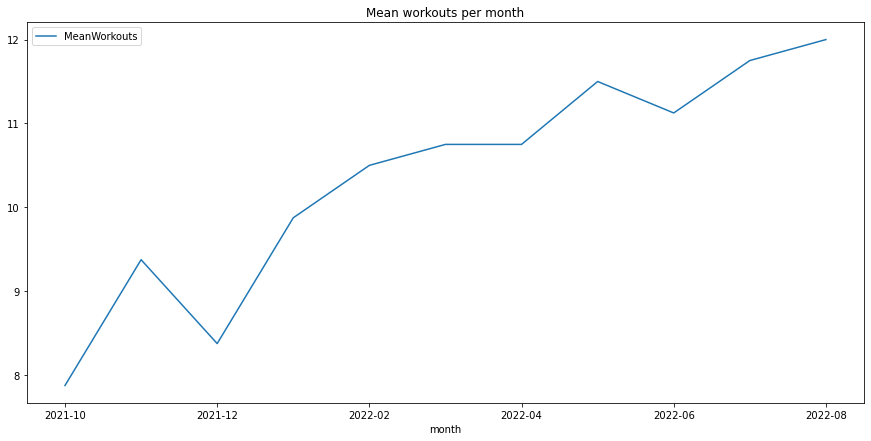

In [646]:
wk_by_month['MeanWorkouts'] = wk_by_month.NumWorkouts.rolling(window=8, center=True).mean()
wk_by_month.plot(x='month', y='MeanWorkouts', title= 'Mean workouts per month', figsize=[15, 7])

In [588]:
cal_by_date = final.groupby(['date'])['activeCalories'].sum().reset_index(name='activeCalories')

In [590]:
cal_by_date.head()

,date,activeCalories
0,2016-04-17,105.0
1,2016-04-18,49.0
2,2016-04-24,210.0
3,2016-05-08,840.0
4,2016-05-10,658.0


In [591]:
cal_by_dow = final.groupby(['dow'])['activeCalories'].sum().reset_index(name='activeCalories')

In [592]:
cal_by_dow

,dow,activeCalories
0,0,14618.046195
1,1,7356.657640
2,2,4707.404127
3,3,5818.288974
4,4,6150.403024
5,5,13438.346255
6,6,9198.599534


In [ ]:
cal_by_date['date'] = pd.to_datetime(cal_by_date['date'])
cal_by_dow['dow'] = cal_by_dow['date'].dt.weekday

Text(0.5, 0, 'Day of Week')

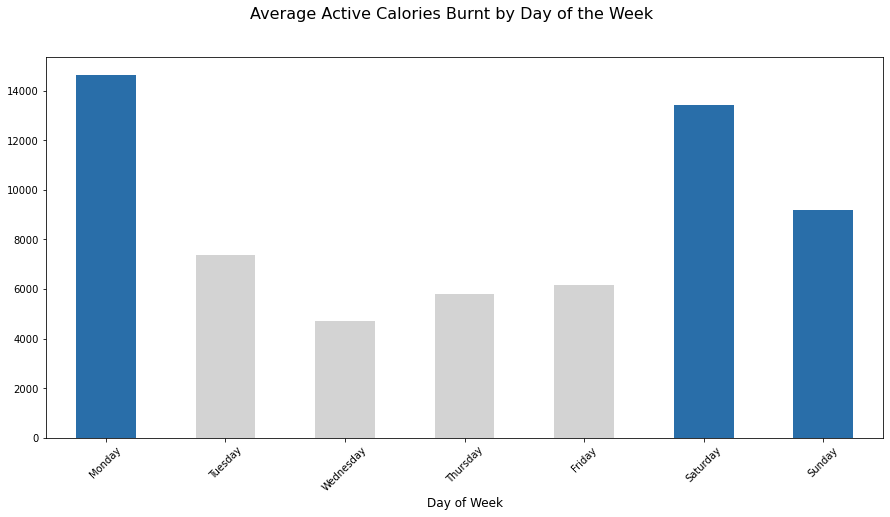

In [649]:
data = cal_by_dow.groupby(['dow'])['activeCalories'].mean()

fig, ax = plt.subplots(figsize=[15, 7])
ax = data.plot(kind='bar', x='day_of_week',color=['#296EA9', 'lightgray', 'lightgray', 'lightgray','lightgray','#296EA9','#296EA9'])

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.75

#fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(False)

plt.suptitle('Average Active Calories Burnt by Day of the Week', fontsize=16)
dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(index, dow_labels, rotation=45)
plt.xlabel('Day of Week', fontsize=12, color='black')

In [605]:
final.tmed.unique()

array([12.2 , 14.6 , 12.8 , 11.  , 12.6 , 11.4 , 18.5 , 19.2 , 17.5 ,
       19.4 , 16.4 , 15.6 , 17.4 , 19.6 , 22.7 , 27.8 , 28.6 , 27.2 ,
       17.2 , 18.3 , 15.1 ,  7.8 , 10.9 , 12.4 , 10.5 ,  8.6 ,  7.1 ,
        5.  ,  6.2 ,  4.7 ,  9.4 ,  7.2 , 11.8 ,  9.6 ,  9.8 ,  9.7 ,
        4.4 ,  5.6 ,  3.8 , 11.2 ,  4.6 ,  4.  ,  7.4 ,  6.5 ,  8.9 ,
        8.5 ,  8.4 , 10.4 ,  9.2 ,  8.8 ,  8.2 , 21.41,  6.3 , 16.  ,
       12.1 , 16.2 , 14.4 , 13.5 , 17.  , 22.2 , 23.6 , 24.8 , 25.6 ,
       31.  , 23.2 , 21.9 , 22.8 , 29.4 , 33.4 , 32.4 , 32.5 , 30.6 ,
       29.8 , 30.1 , 30.2 , 29.6 , 24.2 , 27.  , 28.1 , 26.3 , 27.5 ,
       23.9 , 23.1 , 26.6 , 25.4 , 20.8 , 21.5 , 21.6 , 20.  , 15.9 ,
       20.6 , 21.2 , 18.  , 17.8 , 18.6 , 17.3 , 14.8 , 14.1 , 12.3 ])

In [606]:
bins = [0, 10, 20, 30, 40, np.inf]
names = ['frio', 'templado', 'calido', 'caluroso', 'extremo']

final['tempcat'] = pd.cut(final['tmed'], bins, labels=names)

In [608]:
final.head()

,sourceName,sourceVersion,creationDate,startDate,endDate,workoutActivityType,duration,durationUnit,year,month,date,day,hour,dow,activeCalories,tmed,prec,tempcat
0,Salud,9.3.1,2016-04-18 14:44:33 +0100,2016-04-17 21:30:00+01:00,2016-04-17 21:45:00 +0100,MixedMetabolicCardioTraining,15.0,min,2016,2016-04,2016-04-17,17,23,6,105.0,12.2,0.0,templado
1,Salud,9.3.1,2016-04-18 14:28:56 +0100,2016-04-18 07:28:00+01:00,2016-04-18 07:35:00 +0100,MixedMetabolicCardioTraining,7.0,min,2016,2016-04,2016-04-18,18,9,0,49.0,14.6,0.0,templado
2,Salud,9.3.1,2016-04-25 00:06:28 +0100,2016-04-24 21:30:00+01:00,2016-04-24 22:00:00 +0100,Yoga,30.0,min,2016,2016-04,2016-04-24,24,23,6,210.0,12.8,0.0,templado
3,Salud,9.3.1,2016-05-10 17:07:09 +0100,2016-05-08 21:00:00+01:00,2016-05-08 23:00:00 +0100,Dance,120.0,min,2016,2016-05,2016-05-08,8,23,6,840.0,11.0,14.8,templado
4,Salud,9.3.1,2016-05-10 17:05:30 +0100,2016-05-10 15:30:00+01:00,2016-05-10 17:04:00 +0100,Dance,94.0,min,2016,2016-05,2016-05-10,10,17,1,658.0,12.6,6.6,templado


In [610]:
cal_by_temp = final.groupby(['tempcat'])['activeCalories'].sum().reset_index(name='activeCalories')

In [611]:
cal_by_temp

,tempcat,activeCalories
0,frio,17295.381229
1,templado,23405.711575
2,calido,17132.535244
3,caluroso,3454.117701
4,extremo,0.000000


Text(0.5, 0, 'Temperature')

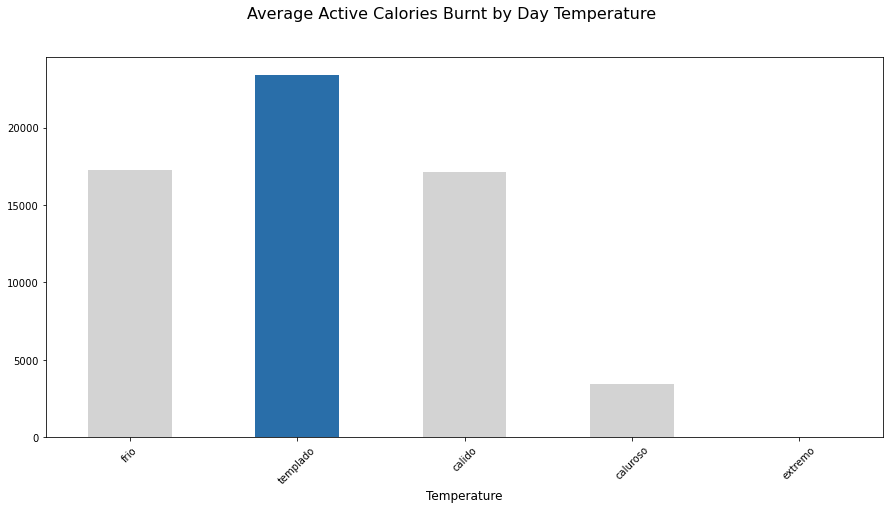

In [650]:
data = cal_by_temp.groupby(['tempcat'])['activeCalories'].mean()

fig, ax = plt.subplots(figsize=[15, 7])
ax = data.plot(kind='bar', x='day_of_week', color=['lightgray', '#296EA9', 'lightgray', 'lightgray','lightgray'])

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.75

#fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(False)

plt.suptitle('Average Active Calories Burnt by Day Temperature', fontsize=16)
plt.xticks(index, rotation=45)
plt.xlabel('Temperature', fontsize=12, color='black')

In [616]:
final.prec.unique()

array([ 0. , 14.8,  6.6,  6.4,  4.2,  0.2,  5.5, 13. ,  0.3,  5.7,  7.3,
        3.9,  3.4,  4.3,  4.1, 15.3,  2.1,  0.8,  1.6, 18.5, 14.5,  7. ,
        3.7,  0.1,  1.4,  2.2,  5.4])

In [620]:
#categorias precipitación
bins = [0.0, 0.1, np.inf]
names = ['No llueve', 'Llueve']

final['preccat'] = pd.cut(final['prec'], bins, labels=names)

In [624]:
final.preccat = final.preccat.fillna('No llueve')

In [626]:
final.head()

,sourceName,sourceVersion,creationDate,startDate,endDate,workoutActivityType,duration,durationUnit,year,month,date,day,hour,dow,activeCalories,tmed,prec,tempcat,preccat
0,Salud,9.3.1,2016-04-18 14:44:33 +0100,2016-04-17 21:30:00+01:00,2016-04-17 21:45:00 +0100,MixedMetabolicCardioTraining,15.0,min,2016,2016-04,2016-04-17,17,23,6,105.0,12.2,0.0,templado,No llueve
1,Salud,9.3.1,2016-04-18 14:28:56 +0100,2016-04-18 07:28:00+01:00,2016-04-18 07:35:00 +0100,MixedMetabolicCardioTraining,7.0,min,2016,2016-04,2016-04-18,18,9,0,49.0,14.6,0.0,templado,No llueve
2,Salud,9.3.1,2016-04-25 00:06:28 +0100,2016-04-24 21:30:00+01:00,2016-04-24 22:00:00 +0100,Yoga,30.0,min,2016,2016-04,2016-04-24,24,23,6,210.0,12.8,0.0,templado,No llueve
3,Salud,9.3.1,2016-05-10 17:07:09 +0100,2016-05-08 21:00:00+01:00,2016-05-08 23:00:00 +0100,Dance,120.0,min,2016,2016-05,2016-05-08,8,23,6,840.0,11.0,14.8,templado,Llueve
4,Salud,9.3.1,2016-05-10 17:05:30 +0100,2016-05-10 15:30:00+01:00,2016-05-10 17:04:00 +0100,Dance,94.0,min,2016,2016-05,2016-05-10,10,17,1,658.0,12.6,6.6,templado,Llueve


In [627]:
cal_by_pec = final.groupby(['preccat'])['activeCalories'].sum().reset_index(name='activeCalories')

In [628]:
cal_by_pec

,preccat,activeCalories
0,No llueve,49465.710021
1,Llueve,11822.035728


Text(0.5, 0, 'Weather')

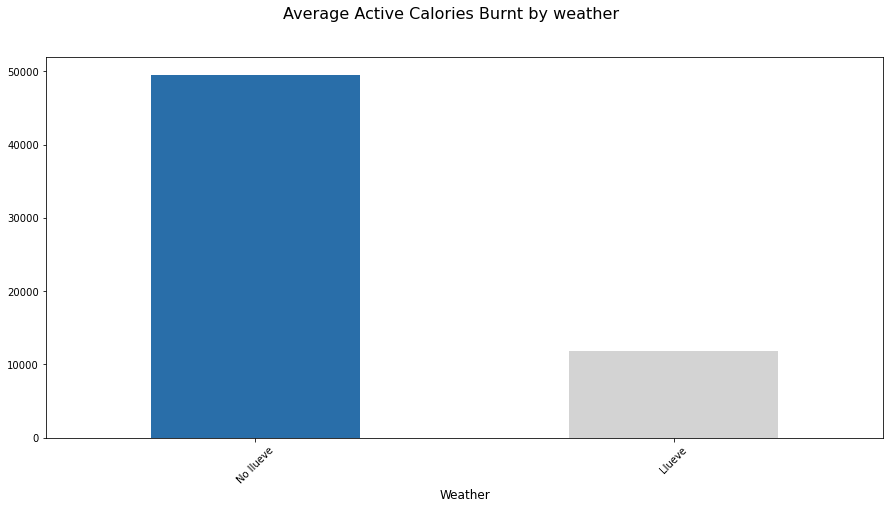

In [651]:
data = cal_by_pec.groupby(['preccat'])['activeCalories'].mean()

fig, ax = plt.subplots(figsize=[15, 7])
ax = data.plot(kind='bar', x='precipitacion', color=['#296EA9', 'lightgray'])

n_groups = len(data)
index = np.arange(n_groups)
opacity = 0.75

#fig, ax = plt.subplots(figsize=[10, 6])
ax.yaxis.grid(False)

plt.suptitle('Average Active Calories Burnt by weather', fontsize=16)
plt.xticks(index, rotation=45)
plt.xlabel('Weather', fontsize=12, color='black')

In [630]:
final.to_csv('wkandweather.csv',sep=',',index=False)